In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from P3_helpers import *

In [2]:
# Load data
df = get_dataframe()
df_vote_evolution = get_timeserie_df(df)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time
67325,Siva1979,Seicer,1,1.0,2008.0,2008-02-21 08:06:00,'''Support''' No problems here. --<font style=...,1,2.533333
114029,Chardish,Davnel03 3,-1,-1.0,2007.0,2007-12-10 21:00:00,'''Oppose''': It'll take more than a few month...,1,1.150000
27431,Minimac,Addihockey10,0,-1.0,2010.0,2010-05-31 06:41:00,"'''Neutral''' Well, reverting vandalism is one...",2,0.433333
109004,Mitchazenia,Versageek,1,1.0,2007.0,2007-12-11 21:37:00,"'''Support''' Trustworthy user, nothing wrong ...",2,14.383333
191974,Rhymeless,Brockert,1,1.0,2004.0,2004-12-11 09:03:00,Support. Seen good things from him. [[User:Rhy...,1,52.233333


# Evolution of votes proportions through time

In [3]:
df_vote_evolution = get_progressive_mean(df_vote_evolution)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,progressive_mean
180181,Bishonen,MarkGallagher,1,1.0,2005.0,2005-11-18 17:25:00,'''Cuddle''' Fuddle.,2,0 days 00:45:00,1.000000
193061,Geogre,Ffirehorse,1,1.0,2004.0,2004-10-21 18:16:00,I'd ''prefer'' nominations to come up after mo...,1,3 days 16:54:00,1.000000
118473,Kmweber,Magioladitis,-1,-1.0,2007.0,2007-12-24 03:34:00,'''Oppose''' &mdash; The mechanical work that ...,1,6 days 02:13:59.999999998,0.142857
162234,Nishkid64,Kseferovic,-1,-1.0,2006.0,2006-12-30 01:42:00,'''Oppose''' per lack of experience in the pro...,1,1 days 04:00:00,0.222222
73010,Jj137,Cobi,1,-1.0,2008.0,2008-03-11 22:06:00,'''Support''' yeah. &nbsp; ''',3,5 days 18:37:00.000000001,1.000000


In [4]:
# Moving average of the progressive mean by filtering the data with a window of 1 hour
rolling_avg = df_vote_evolution.groupby(['Results', pd.Grouper(key='Voting_time', freq='1h', origin='start')]).progressive_mean

# Compute the median, first and last quartile
quartiles = get_quartiles(rolling_avg)
quartiles.Voting_time = time_to_float(quartiles.Voting_time)

# Compute the mean and 95% confidence interval
sem = get_confidence_interval(rolling_avg)
sem.Voting_time = time_to_float(sem.Voting_time)

# Display the results
display(quartiles.sample(5))
display(sem.sample(5))

,Results,Voting_time,lower,center,upper
397,1.0,177.0,1.000000,1.0,1.0
319,1.0,99.0,1.000000,1.0,1.0
424,1.0,205.0,1.000000,1.0,1.0
627,1.0,656.0,1.000000,1.0,1.0
106,-1.0,106.0,0.293043,1.0,1.0


,Results,Voting_time,center,sem,lower,upper
367,1.0,147.0,0.956707,0.006383,0.944197,0.969217
370,1.0,150.0,0.960179,0.006775,0.946900,0.973459
381,1.0,161.0,0.961099,0.006272,0.948805,0.973392
103,-1.0,103.0,0.608360,0.040438,0.529101,0.687619
277,1.0,57.0,0.981470,0.003107,0.975380,0.987559


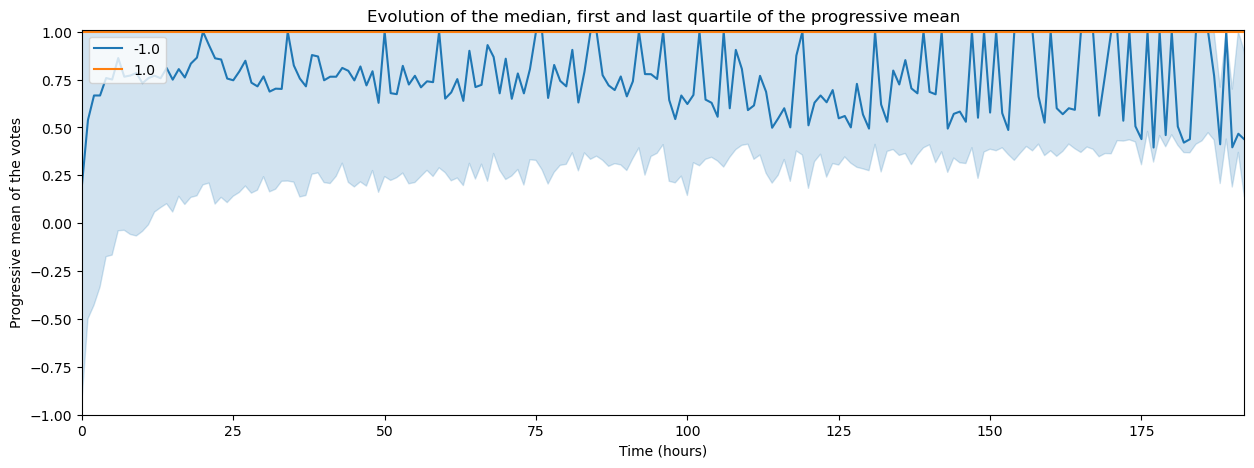

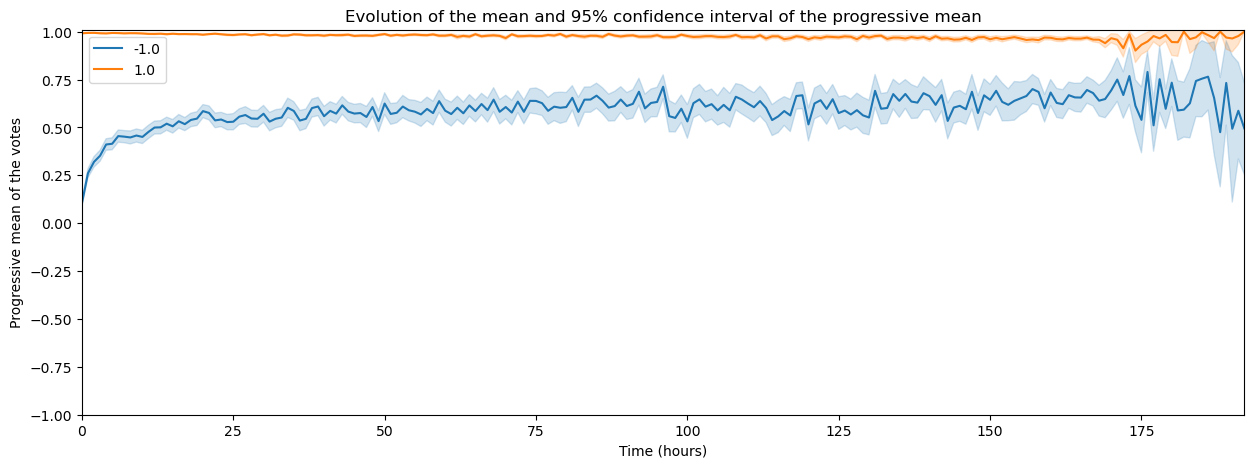

In [5]:
# Plot the evolution of the median, first and last quartile of the progressive mean
ax = plot_vote_evolution(quartiles, 'Voting_time')
ax.set_title('Evolution of the median, first and last quartile of the progressive mean')
plt.show()

# Plot the evolution of the mean and 95% confidence interval of the progressive mean
ax = plot_vote_evolution(sem, 'Voting_time')
ax.set_title('Evolution of the mean and 95% confidence interval of the progressive mean')
plt.show()


In [6]:
# Election evolution by vote rank
# For each vote add a column with the number of votes that were casted before it
rank = df_vote_evolution.groupby(['Results', 'Target', 'Round']).apply(lambda x: pd.Series(np.arange(1, len(x)+1), index=x.index)).reset_index(level=[0,1,2], drop=True)
# Combine the rank with the original dataframe
rank = df_vote_evolution.join(rank.rename('rank'))
rank = rank.groupby(['Results', 'rank']).progressive_mean

# Compute the median, first and last quartile
quartiles = get_quartiles(rank)

# Compute the mean and 95% confidence interval
sem = get_confidence_interval(rank)

# Display the results
display(quartiles.sample(5))
display(sem.sample(5))

,Results,rank,lower,center,upper
394,1.0,118,1.000000,1.000000,1.000000
505,1.0,229,0.557030,0.754941,0.976285
130,-1.0,131,0.306469,0.522455,1.000000
428,1.0,152,1.000000,1.000000,1.000000
170,-1.0,171,0.435583,0.750000,1.000000


,Results,rank,center,sem,lower,upper
497,1.0,221,0.958222,0.041778,0.876338,1.040107
295,1.0,19,0.987308,0.001433,0.984499,0.990118
373,1.0,97,0.973713,0.005112,0.963692,0.983733
203,-1.0,204,0.648295,0.100590,0.451139,0.845451
250,-1.0,251,0.797333,0.202667,0.400107,1.194560


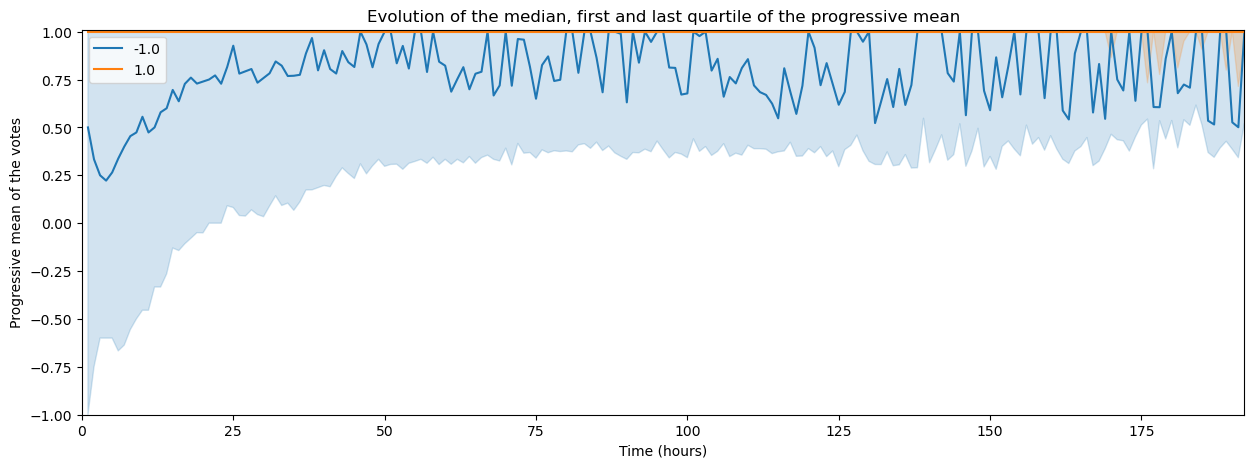

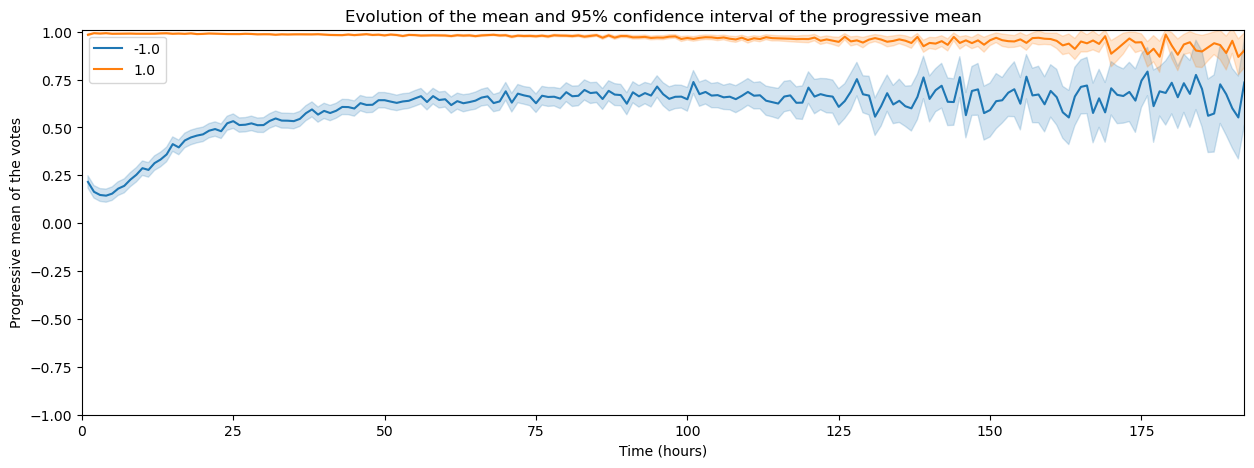

In [7]:
# Plot the evolution of the median, first and last quartile of the progressive mean
ax = plot_vote_evolution(quartiles, 'rank')
ax.set_title('Evolution of the median, first and last quartile of the progressive mean')
plt.show()

# Plot the evolution of the mean and 95% confidence interval of the progressive mean
ax = plot_vote_evolution(sem, 'rank')
ax.set_title('Evolution of the mean and 95% confidence interval of the progressive mean')
plt.show()

# Knowledge tracing models to predict the outcome of the election

In [ ]:
import 